In [23]:
print("First I had to install a number of libraries")

First I had to install a number of libraries


In [24]:
print("importing all the libraries")

importing all the libraries


In [25]:
import tensorflow 
from tensorflow import keras
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import InputLayer, Convolution2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from tensorflow.python.keras.utils import np_utils
import itertools




In [26]:
print("just to make sure that its working")
print("I'll import the dataset and draw 2 at random")

just to make sure that its working
I'll import the dataset and draw 2 at random


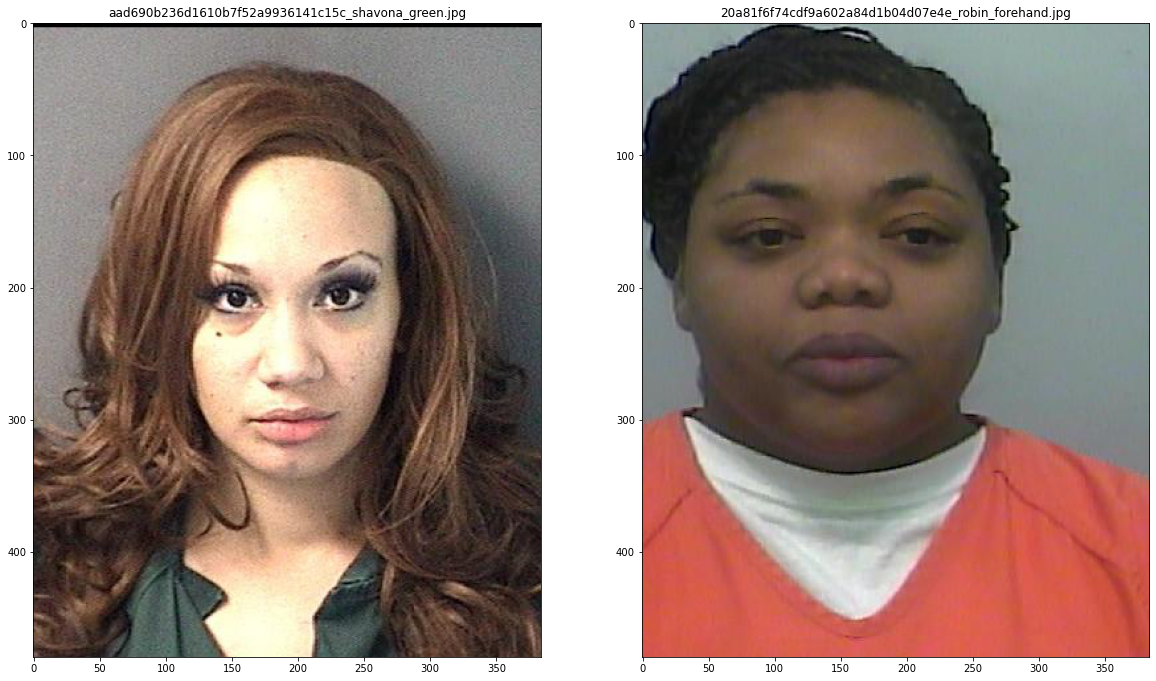

In [27]:
import random
plt.figure(figsize=(20,20))
img_folder=r'C:\Users\emeka\Kemka Coding Portfolio\CNN4CTY\new training\FB'
for i in range(2):
    file = random.choice(os.listdir(img_folder))
    image_path = os.path.join(img_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,2,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [28]:
print("making them all the same size in the training folder")

making them all the same size in the training folder


In [29]:
IMG_WIDTH=200
IMG_HEIGHT=200
img_folder=r'C:\Users\emeka\Kemka Coding Portfolio\CNN4CTY\new training\FB'

In [30]:
print("now getting the data ready and building the CNN")

now getting the data ready and building the CNN


In [32]:
def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name
# extract the image array and class name
img_data, class_name =create_dataset(r'C:\Users\emeka\Kemka Coding Portfolio\CNN4CTY\new training')

In [33]:
print("establishing the classification labels")

establishing the classification labels


In [34]:
target_dict={k: v for v, k in enumerate(np.unique(class_name))}
target_dict

{'FB': 0, 'FW': 1, 'MB': 2, 'MW': 3, 'OF': 4, 'OM': 5}

In [35]:
target_val=  [target_dict[class_name[i]] for i in range(len(class_name))]

In [36]:
model=tensorflow.keras.Sequential(
        [
            tensorflow.keras.layers.InputLayer(input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)),
            tensorflow.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2, 2), activation='relu'),
            tensorflow.keras.layers.Conv2D(filters=128, kernel_size=3, strides=(2, 2), activation='relu'),
            tensorflow.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2, 2), activation='relu'),
            tensorflow.keras.layers.Conv2D(filters=128, kernel_size=3, strides=(2, 2), activation='relu'),
            tensorflow.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2, 2), activation='relu'),
            tensorflow.keras.layers.Flatten(),
            tensorflow.keras.layers.Dense(6)
        ])
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [37]:
history = model.fit(x=np.array(img_data, np.float32), y=np.array(list(map(int,target_val)), np.float32), epochs=25)

Epoch 1/25
4/4 [==============================] - 2s 283ms/step - loss: 8.5280 - accuracy: 0.1833
Epoch 2/25
4/4 [==============================] - 1s 281ms/step - loss: 9.2649 - accuracy: 0.2333
Epoch 3/25
4/4 [==============================] - 1s 290ms/step - loss: 7.3482 - accuracy: 0.2667
Epoch 4/25
4/4 [==============================] - 1s 282ms/step - loss: 1.9369 - accuracy: 0.2000
Epoch 5/25
4/4 [==============================] - 1s 297ms/step - loss: 1.7918 - accuracy: 0.2333
Epoch 6/25
4/4 [==============================] - 1s 285ms/step - loss: 1.7918 - accuracy: 0.2333
Epoch 7/25
4/4 [==============================] - 1s 276ms/step - loss: 1.7918 - accuracy: 0.2333
Epoch 8/25
4/4 [==============================] - 1s 280ms/step - loss: 1.7918 - accuracy: 0.2333
Epoch 9/25
4/4 [==============================] - 1s 288ms/step - loss: 1.7918 - accuracy: 0.2333
Epoch 10/25
4/4 [==============================] - 1s 281ms/step - loss: 1.7918 - accuracy: 0.2333
Epoch 11/25
4/4 [==

In [38]:
print("did it work??")


did it work??


In [39]:
print("I think it did :)")

I think it did :)


In [40]:
print("yeah thats pretty much it. summary of the model's performance")

yeah thats pretty much it. summary of the model's performance


In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 99, 99, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 49, 49, 128)       73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        73792     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 5, 5, 64)          73792     
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 9